Most questions don't need codes to be answered, but I will still use codes to accumulate a complete solution through questions and to provide solid answers instead of just words. Also I'll use codes to analize and calculate statistics that help me understand and answer better. Because I used too much code my answers might seem very long. but this is no true. If you ignored the codes, you'll save time.

## **1️⃣ Understanding the Data**

### **Q 1.1 Describe the structure of the data:**

In [216]:
import pandas as pd

# I personally prefer reading the dataset into a pandas.DataFrame object to analyze it and preprocess it easily
df = pd.read_excel("Telemetry_Dumps_ssbms_18-11-2025_ZN.10-PB.1_child__1_ch3pm.xlsx")

In [217]:
print('Feature names: ', sorted(df.columns)) # I sorted the columns to gather similar quantities together, g.e. 'Amp1', 'Amp2', 'Amp3'.
print('Features count: ', len(df.columns))

print('samples count: ', len(df))

Feature names:  ['Amp1', 'Amp2', 'Amp3', 'Hz', 'PF1', 'PF2', 'PF3', 'PFa', 'TkVAr', 'TkW', 'V1', 'V2', 'V3', 'Vn1', 'Vn2', 'Vn3', 'datetime', 'kVAr1', 'kVAr2', 'kVAr3', 'kVArh', 'kW1', 'kW2', 'kW3', 'kWh', 'timestamp']
Features count:  26
samples count:  8882


### As it's clear above, this is a tabular dataset with 26 features/columns and 8882 samples/rows

In [218]:
# display the first five samples/rows
df.head()

,timestamp,PF1,kW1,kVAr1,kWh,Amp1,kVArh,Hz,Vn1,Amp2,...,kVAr3,TkVAr,kW2,TkW,PFa,kVAr2,PF3,PF2,kW3,datetime
0,1759266061998,0.6,0.308,-5.6,7123.6,2.4,8.33,59.94,227.8,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-01-01 AM
1,1759266363510,0.6,0.308,-5.6,7124.0,2.4,8.33,59.99,228.1,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-06-03 AM
2,1759266664943,0.6,0.312,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,6.0,-19.4,-0.036,0.840,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-11-04 AM
3,1759266966433,0.6,0.308,-5.6,7124.0,2.4,8.33,59.98,228.5,4.4,...,6.0,-19.5,-0.036,0.836,0.39,-19.9,0.92,-0.04,0.564,2025-10-01 12-16-06 AM
4,1759267267961,0.6,0.308,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,8.2,-17.1,-0.044,0.868,0.39,-19.7,0.88,-0.04,0.604,2025-10-01 12-21-07 AM


### **Q 1.2 Explain what each column represents:**

First, I have to mention that in this proposed building power system, we are using three phases. Each phase is an independent AC wave with a 120 degrees shift from the others. This explain why sometimes there are three difeerent values/features for the same quantity (e.g. 'PF1', 'PF2', 'PF3'). Knowing that, I'll explain each quantity only once, and I won't repeat it for every phase.

- **Amp:** The electrical current that is currently being drawn at a specific phase.
- **Hz:** The frequency, g.e. 50Hz or 60Hz.
- **PF:** This is the power factor which measures the electrical power efficiency at a specific phase.
- **PFa:** I searched a lot and tried several equations trying to calculate this myself in order to figure out what is it but I didn't find an answer.
- **TkVAr:** Total reactive power (i.e. kVAr1 + kVAr2 + kVAr3). I verified this using ```df[['kVAr1', 'kVAr2', 'kVAr3']].sum(axis=1)```
- **TkW:** Total active power (i.e. kW1 + kW2 + kW3). I verified this using ```df[['kW1', 'kW2', 'kW3']].sum(axis=1)```
- **V:** The Voltage at a specific phase.
- **Vn:** The Voltage difference between a specific phase Voltage and the neutral cable Voltage.
- **datetime:** The date at which the measurement was taken.
- **kVAr:** This is the reactive power at a specific phase, which is a part of power that doesn't get consumed in real work.
- **kVArh:** This is the accumulated reacive energy over time.
- **kW:** This is the active power component at a specific phase that does work. 
- **kWh:** This is the accumulated active energy over time.
- **timestamp:** The time at which the measurement was taken.

### **Q 1.3 Identify potential issues in the data (missing values, noise, anomalies, duplicates, misalignment, etc.):**

- #### **missing values:**

By inspecting the data file by eyes, I guess there are no missing values. But this method isn't reliable enough. Thus, the following code checks whether there is any unassigned value, and count these values at each column:

In [219]:
df.isna().sum()

timestamp    0
PF1          0
kW1          0
kVAr1        0
kWh          0
Amp1         0
kVArh        0
Hz           0
Vn1          0
Amp2         0
V2           0
Amp3         0
V1           0
Vn2          0
V3           0
Vn3          0
kVAr3        0
TkVAr        0
kW2          0
TkW          0
PFa          0
kVAr2        0
PF3          0
PF2          0
kW3          0
datetime     0
dtype: int64

These zeros indicate that all the cells in the dataset are assigned to a value. But, while it is true that this is fine for the 25 neumerical data type columns we have, the "datatime" column is string, I might not have a true value if it is assigned to empty string ('' or ""). Thus, I use the following code to check for this:

In [220]:
(df['datetime'] == '').sum()

np.int64(0)

- #### **duplicates:**

If I'm not wrong, it is not an issue if any of the readings got repeated/suplicated. This is an issue only for "datetime" and "timestamp".

In [221]:
print('total number of duplicated "datetime" values: ', df['datetime'].duplicated().sum())
print('total number of duplicated "timestamp" values: ', df['timestamp'].duplicated().sum())

total number of duplicated "datetime" values:  0
total number of duplicated "timestamp" values:  0


- #### **anomalies & outliers:**
 
To detect and check if we have any anomalies, I'll use Interquartile range rule (IQR). Since I studied this statistical method before, and it's simple and fast to implement.

In [222]:
for column in sorted(df.columns.drop('datetime')):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    anomalies = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)][column]
    print('feature/column: ', column)
    print('lower limit: ', Q1 - 1.5 * IQR)
    print('upper limit: ', Q3 + 1.5 * IQR)
    print('avg: ', df[column].mean())
    print('std: ', df[column].std())
    print('min: ', df[column].min())
    print('max: ', df[column].max())
    print('anomalies count: ', len(anomalies))
    print('unique anomalies: ', anomalies.unique(), '\n')

feature/column:  Amp1
lower limit:  -0.20000000000000018
upper limit:  4.6000000000000005
avg:  2.246656158522855
std:  0.6883156021705701
min:  1.2
max:  8.8
anomalies count:  20
unique anomalies:  [5.2 4.8 8.8] 

feature/column:  Amp2
lower limit:  3.3999999999999995
upper limit:  5.000000000000001
avg:  4.744562035577572
std:  1.8372486916326265
min:  2.8000000000000003
max:  18.4
anomalies count:  1599
unique anomalies:  [11.6  8.8 17.2 16.4  3.2 10.4 10.8 11.2  8.   9.2  5.2 12.8 12.   7.2
  7.6  8.4 15.6 17.6 12.4  9.6 14.  16.8  6.   5.6 10.  13.6 14.4 18.4
 16.   2.8  6.4 14.8 18.   6.8] 

feature/column:  Amp3
lower limit:  1.4
upper limit:  6.200000000000001
avg:  4.015537041206936
std:  1.9500234838250388
min:  2.8000000000000003
max:  23.6
anomalies count:  500
unique anomalies:  [15.6  9.2  8.8 10.4 10.8 16.  16.4  8.4 20.8 14.4 10.  16.8 17.2  9.6
 15.2 11.2  6.4 17.6 23.2 23.6 12.8 11.6 21.2 12.   6.8 22.8 12.4  7.6] 

feature/column:  Hz
lower limit:  59.879999999999995

#### Anomalies discussion:

- **Currents (Amp1, Amp2, Amp3):** These readings are not stable. They have huge std. values, wide IQR limits, and the some outliers are very extreme and far from average.
- **Frequency (Hz):** The readings are precise and perfect.
- **Power Factors (PF1, PF2, PF3, PFa):** The readings were mostly precise. Even most of the outliers were fine. But, some outliers were extremer than to be ignored. But such outliers are very few. Thus, I guess we can later replace these few values with the average or the closest limit.
- **Voltage Readings (V1, V2, V3, Vn1, Vn2, Vn3):** These readings are very stable and almost always close to the average. Also none of the outliers were very extreme or weird. Thus, in my humble opinion, I think these outliers can just be ignored.
- **Powers (TkVAr, TkW, kVAr1, kVAr2, kVAr3, kW1, kW2, kW3):** These readings are not stable. They have huge std. values, wide IQR limits, and the some outliers are very extreme and far from average.
- **Accumulated Energies (kVArh, kWh):**  The readings are precise and perfect.

- #### **anomalies & noise:**

I will define a noise to be a physically wrong value or a weird behaviour of the data. The previous analysis showed that the Frequency, Voltages, and Accumulated Energies readings are fine and don't suffer from any weird behaviour or wrong values. Thus, these readings will be skipped at this step. But I'll just check the rest.

Note: in this definition, anomalies and noise definitions can intersect.

- **physically wrong values:** These are the values that don't make sense, such as the current having a negative value, the scale of the power factor is gratter than 1.0, and accumulated energies decrease. It is clear above that the first two issues don't exist. But I am not sure about the last one. I'll use the following code to check for this:

In [223]:
print('the number of the active energy decreased: ', (df['kWh'].diff() < 0).sum())
print('the number of the reactive energy decreased: ', (df['kVArh'].diff() < 0).sum())

the number of the active energy decreased:  0
the number of the reactive energy decreased:  0


- **sudden changes:** Noise usually changes the values fast and instantally. The following code illustrates this behaviour visually:

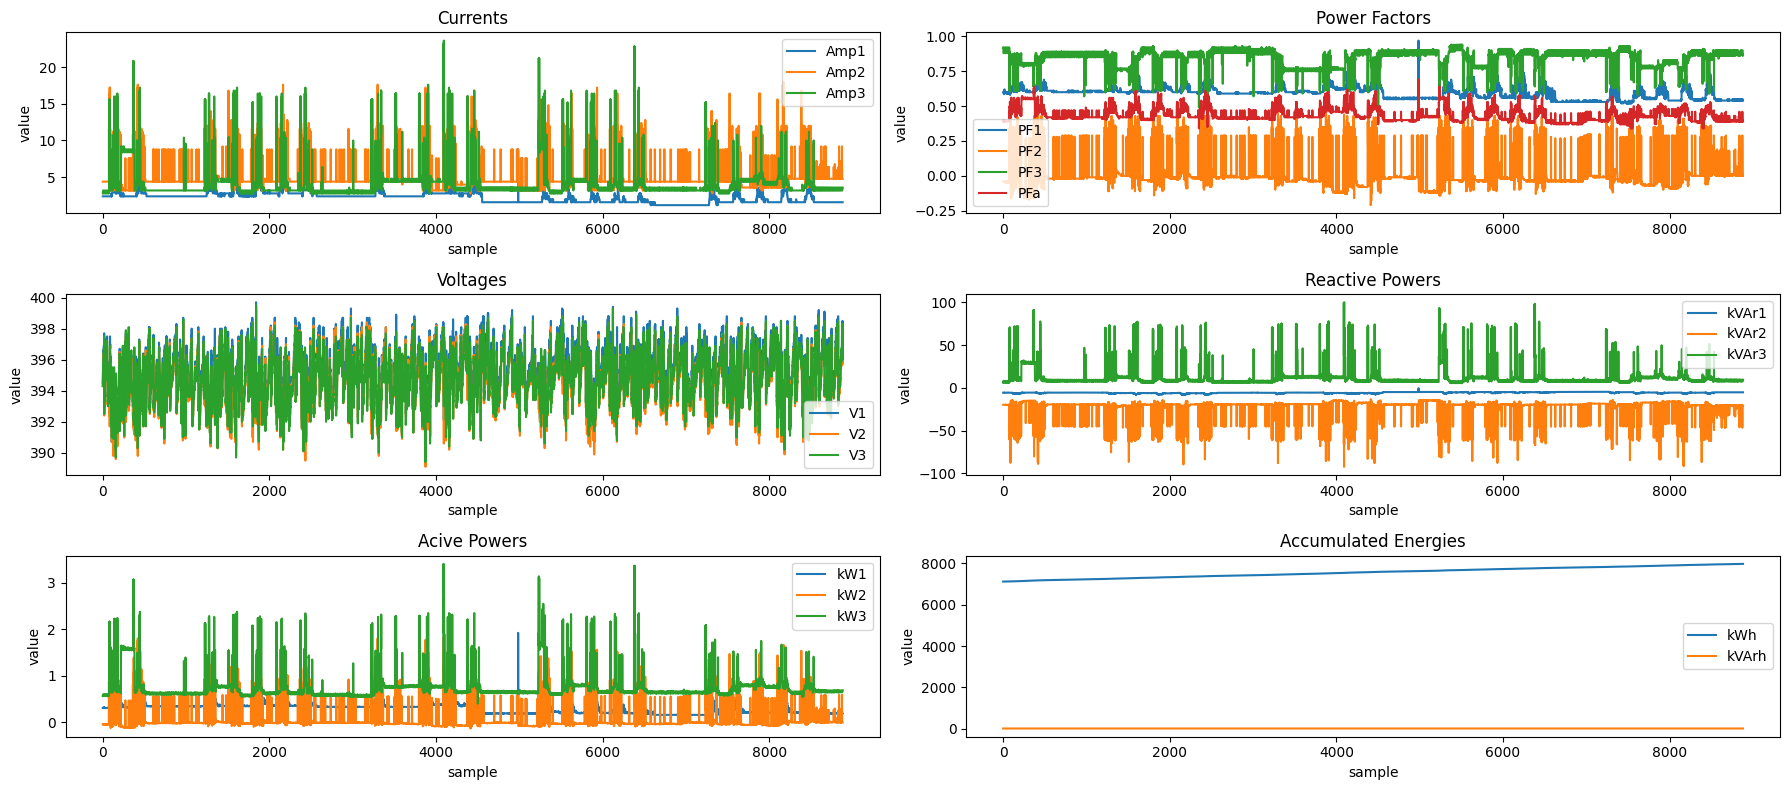

In [227]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

plt.subplot(3, 2, 1)
plt.plot(df[['Amp1', 'Amp2', 'Amp3']], label=['Amp1', 'Amp2', 'Amp3'])
plt.title('Currents')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df[['PF1', 'PF2', 'PF3', 'PFa']], label=['PF1', 'PF2', 'PF3', 'PFa'])
plt.title('Power Factors')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df[['V1', 'V2', 'V3']], label=['V1', 'V2', 'V3'])
plt.title('Voltages')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df[['kVAr1', 'kVAr2', 'kVAr3']], label=['kVAr1', 'kVAr2', 'kVAr3'])
plt.title('Reactive Powers')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df[['kW1', 'kW2', 'kW3']], label=['kW1', 'kW2', 'kW3'])
plt.title('Acive Powers')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df[['kWh', 'kVArh']], label=['kWh', 'kVArh'])
plt.title('Accumulated Energies')
plt.xlabel("sample")
plt.ylabel('value')
plt.legend()


plt.tight_layout()
plt.show()

Notice how the spikes are the same or similar through all dependent quantities/columns of the same phase. 

- #### **misalignments:**

I am not sure what does "misalignment" means exactly in this context. But my guess is that it means incorrect samples/rows ordering, missing timestamps or inconsistent time gaps, timestamps don't match datetimes, or unmatched relationships between values.

- The following code checks for **sample orders**:

In [228]:
# convert the datetime column's data type from string into TimestampSeries in order to use .diff() directly.
diff_dt = pd.to_datetime(df['datetime'], format="%Y-%m-%d %I-%M-%S %p")

print('number of unordered datetime values', (diff_dt.diff().dt.total_seconds() < 0).sum())
print('number of unordered timestamp values', (df['timestamp'].diff() < 0).sum())

number of unordered datetime values 0
number of unordered timestamp values 0


- **missing timestamps or inconsistent time gaps:** The following code shows that the time difference between each sample and the next one is for the vast majority between 05:01 and 05:02 or 301000 and 302000 ms:

In [229]:
print("df['timestamp'].diff():", df['timestamp'].diff()[1:11].values)
print("\ndiff_dt.diff():")
print(diff_dt.diff()[1:11])

df['timestamp'].diff(): [301512. 301433. 301490. 301528. 301372. 301673. 301485. 301505. 301417.
 301515.]

diff_dt.diff():
1    0 days 00:05:02
2    0 days 00:05:01
3    0 days 00:05:02
4    0 days 00:05:01
5    0 days 00:05:02
6    0 days 00:05:02
7    0 days 00:05:01
8    0 days 00:05:01
9    0 days 00:05:02
10   0 days 00:05:01
Name: datetime, dtype: timedelta64[ns]


This is perfect, 5 minutes is equal to 300000 ms! But now let's check whether or not there are any missing samples or inconsistent gaps:

In [230]:
dt_seconds = diff_dt.diff().dt.total_seconds().dropna() # the first element is always nan

dt_lt_301 = dt_seconds[dt_seconds < 301]
print('datetime derivaties that have a value less than 301: ')
print('\nderivaties: ', dt_lt_301.values)
print('\nindices: ', list(dt_lt_301.index))
print('\ncount: ', len(dt_lt_301))
print('\nmin: ', dt_lt_301.min())
print('max: ', dt_lt_301.max())
print('mean: ', dt_lt_301.mean())

print('\n===============================================\n')

dt_gt_302 = dt_seconds[dt_seconds > 302]
print('datetime derivaties that have a value greater than 302: ')
print('\nderivaties: ', dt_gt_302.values)
print('\nindices: ', list(dt_gt_302.index))
print('\ncount: ', len(dt_gt_302))
print('\nmin: ', dt_gt_302.min())
print('max: ', dt_gt_302.max())
print('mean: ', dt_gt_302.mean())

print('\n===============================================\n')

ts_ms = df['timestamp'].diff().dropna()

ts_lt_301000 = ts_ms[ts_ms < 301000]
print('timestamp derivaties that have a value less than 301000: ')
print('\nderivaties: ', ts_lt_301000.values)
print('\nindices: ', list(ts_lt_301000.index))
print('\ncount: ', len(ts_lt_301000))
print('\nmin: ', ts_lt_301000.min())
print('max: ', ts_lt_301000.max())
print('mean: ', ts_lt_301000.mean())

print('\n===============================================\n')

ts_gt_302000 = ts_ms[ts_ms > 302000]
print('timestamp derivaties that have a value greater than 302000: ')
print('\nderivaties: ', ts_gt_302000.values)
print('\nindices: ', list(ts_gt_302000.index))
print('\ncount: ', len(ts_gt_302000))
print('\nmin: ', ts_gt_302000.min())
print('max: ', ts_gt_302000.max())
print('mean: ', ts_gt_302000.mean())

datetime derivaties that have a value less than 301: 

derivaties:  [300. 300. 300. 300. 300. 300. 300. 300.]

indices:  [123, 1513, 1951, 3951, 3953, 4185, 5290, 5923]

count:  8

min:  300.0
max:  300.0
mean:  300.0


datetime derivaties that have a value greater than 302: 

derivaties:  [316. 310. 308. 303. 313. 305. 307. 311. 310. 308. 311. 307. 303. 307.
 311. 303. 312. 306. 303. 310. 308. 311. 307. 309. 309. 310. 309. 316.
 310. 308. 314. 304. 315. 303. 315. 303. 303. 303. 309. 308. 304. 313.
 310. 308. 306. 304. 314. 315. 303. 315. 303. 315. 303. 303. 316. 313.
 305. 316. 317. 310. 308. 307. 311. 316. 303. 306. 312. 309. 309. 309.
 309. 309. 309. 315. 303. 314. 304. 305. 312. 306. 303. 305. 313. 315.
 303.]

indices:  [176, 415, 416, 463, 642, 643, 875, 876, 1108, 1109, 1341, 1342, 1514, 1574, 1575, 1717, 1807, 1808, 1950, 2046, 2047, 2279, 2280, 2512, 2513, 2745, 2746, 2972, 3205, 3206, 3444, 3445, 3671, 3672, 3904, 3905, 3952, 3954, 4137, 4138, 4233, 4234, 4364, 4365, 4388, 45

So far everything is perfect enough. All samples are ordered correctly and the difference in times are consistent. As it's shown above, some time differences are slightly bigger or shorter than normal. But this isn't an issue sonce these differences are very small and can just be neglected.

- **timestamps don't match datetimes:** The following code will check this one:

In [231]:
a = pd.to_datetime(df['datetime'], format="%Y-%m-%d %I-%M-%S %p").apply(lambda x: int(x.timestamp()))
a

0       1759276861
1       1759277163
2       1759277464
3       1759277766
4       1759278067
           ...    
8877    1761953857
8878    1761954159
8879    1761954460
8880    1761954762
8881    1761955063
Name: datetime, Length: 8882, dtype: int64

In [232]:
b = df['timestamp'].apply(lambda x: int(x / 1000))
b

0       1759266061
1       1759266363
2       1759266664
3       1759266966
4       1759267267
           ...    
8877    1761943057
8878    1761943359
8879    1761943660
8880    1761943962
8881    1761944263
Name: timestamp, Length: 8882, dtype: int64

At first glance, I thought that this huge diffrences between the two columns/features is a type of error or something. But after digging deeper, I noticed that all the diffrences are actually the same. There is exactly a 3 hours shift between all the values in these two columns. The following code illustrates this:

In [233]:
print('total differences:', ((a - b) != 0).sum(), '/', a.count())
print('unique differences:', (a - b).unique())

total differences: 8882 / 8882
unique differences: [10800]


This 3 hours shift is not a big deal actually. It is caused because the column "datetime" doesn't use a time zone, meanwhile, "timestamp" uses the Saudi time zone, i.e. UTC+3. This can be easily fixed by just adding or removing 3 hours from any column, or just use the same time zone for both.

Now we just showd that exactly all the values between these two columns are 100% consistent!

- **unmatched relationships between values:** Some physical quantities have relationships, for example, the power must increase if the current also increased but the voltage stayed constant. The following code will check these relationships:

In [234]:
df

,timestamp,PF1,kW1,kVAr1,kWh,Amp1,kVArh,Hz,Vn1,Amp2,...,kVAr3,TkVAr,kW2,TkW,PFa,kVAr2,PF3,PF2,kW3,datetime
0,1759266061998,0.60,0.308,-5.6,7123.6,2.4,8.33,59.94,227.8,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-01-01 AM
1,1759266363510,0.60,0.308,-5.6,7124.0,2.4,8.33,59.99,228.1,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-06-03 AM
2,1759266664943,0.60,0.312,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,6.0,-19.4,-0.036,0.840,0.39,-19.8,0.92,-0.04,0.564,2025-10-01 12-11-04 AM
3,1759266966433,0.60,0.308,-5.6,7124.0,2.4,8.33,59.98,228.5,4.4,...,6.0,-19.5,-0.036,0.836,0.39,-19.9,0.92,-0.04,0.564,2025-10-01 12-16-06 AM
4,1759267267961,0.60,0.308,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,8.2,-17.1,-0.044,0.868,0.39,-19.7,0.88,-0.04,0.604,2025-10-01 12-21-07 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,1761943057779,0.54,0.192,-5.3,7979.6,1.6,8.33,60.01,229.6,4.8,...,7.5,-18.4,0.000,0.844,0.39,-20.6,0.90,0.00,0.648,2025-10-31 11-37-37 PM
8878,1761943359324,0.54,0.192,-5.3,7979.6,1.6,8.33,60.00,229.7,4.8,...,9.8,-16.1,0.000,0.884,0.40,-20.6,0.86,0.00,0.688,2025-10-31 11-42-39 PM
8879,1761943660860,0.54,0.196,-5.3,7980.0,1.6,8.33,60.06,228.9,4.8,...,9.6,-16.2,0.000,0.880,0.40,-20.5,0.87,0.00,0.688,2025-10-31 11-47-40 PM
8880,1761943962361,0.54,0.196,-5.3,7980.0,1.6,8.33,60.05,230.2,4.8,...,9.6,-16.3,0.000,0.884,0.39,-20.6,0.87,0.00,0.688,2025-10-31 11-52-42 PM


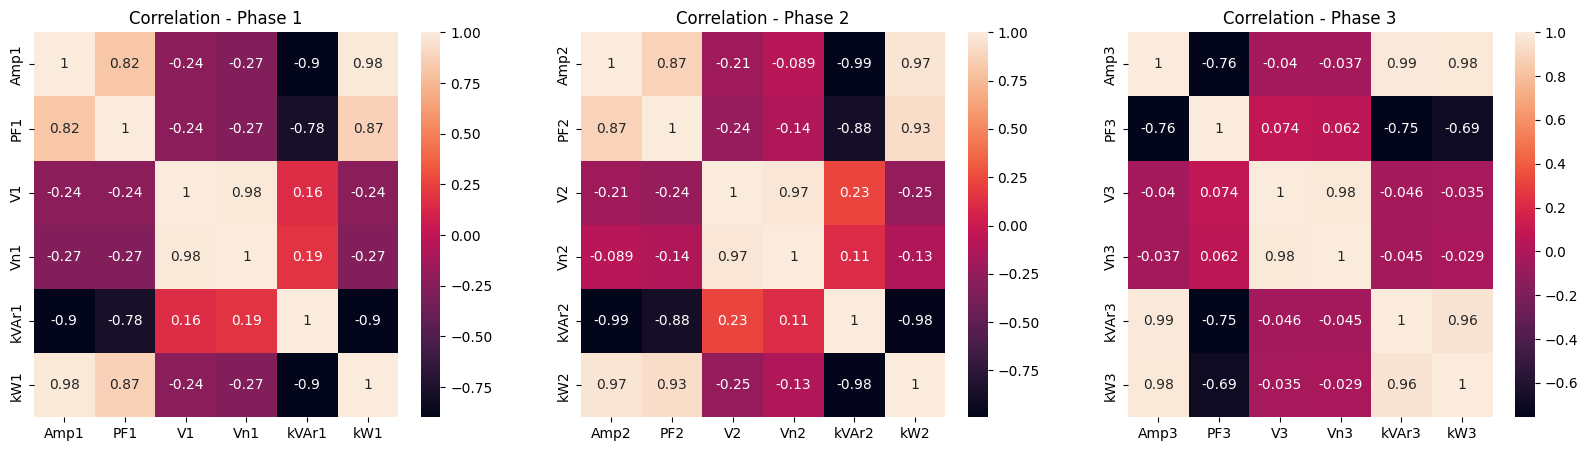

In [235]:
import seaborn as sns

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.heatmap(df[['Amp1', 'PF1', 'V1', 'Vn1', 'kVAr1', 'kW1']].corr(), annot=True)
plt.title("Correlation - Phase 1")

plt.subplot(1, 3, 2)
sns.heatmap(df[['Amp2', 'PF2', 'V2', 'Vn2', 'kVAr2', 'kW2']].corr(), annot=True)
plt.title("Correlation - Phase 2")

plt.subplot(1, 3, 3)
sns.heatmap(df[['Amp3', 'PF3', 'V3', 'Vn3', 'kVAr3', 'kW3']].corr(), annot=True)
plt.title("Correlation - Phase 3")
plt.show()

**Correlations Discussion:**
- **Amp vs. kW:** The graph shows strong positive correlation between these two features through all phases. This makes sense. If you looked at the graph that plots the voltages, you'll notice that they are constant but with noises. Thus, since the voltages are mostly constant, and only currents suffers from sudden spikes, the Active Power will be driven by the current heavily.
- **Amp vs. PF:** This correlation is strong though all phases but the sign changes. After a fast research I did, I guess that this behaviour is possible in cases where the current affects the power efficiency heavily.

I didn't discuss the rest due to time shortage. But in a nutshell, these correlations are physically possible.

### **Q 1.4 Classify each telemetry key (continuous, categorical, boolean, etc.):**

After inspecting the data file manually, I noticed that all columns/features have continuous values except for two, which are the timestamp, and datetime. The timestamp values are discrete integers, while datetime is a string.

Also, I think the following code illustrates this better:

In [236]:
df.dtypes

timestamp      int64
PF1          float64
kW1          float64
kVAr1        float64
kWh          float64
Amp1         float64
kVArh        float64
Hz           float64
Vn1          float64
Amp2         float64
V2           float64
Amp3         float64
V1           float64
Vn2          float64
V3           float64
Vn3          float64
kVAr3        float64
TkVAr        float64
kW2          float64
TkW          float64
PFa          float64
kVAr2        float64
PF3          float64
PF2          float64
kW3          float64
datetime      object
dtype: object

### **Q 1.5 Briefly explain what the telemetry values represent operationally:**

These values are collected from multiple sensors almost every 5 minutes. The sensors measures a lot of important physical quantities to grasp a strong undertanding about the power consumption of a building. Some of these values suffer from noises such as the Voltages. But after inspecting a little bit, I guess this noise didn't affect the rest of quantities/features/columns that much. Also some values suffered from sudden high spikes such as currents. And I noiced how these same spikes got repeated in all the other quantities/values that depends on the current, such as powers for example. I guess such behaviour means that these anomalies aren't caused by snesor errors, and I guess that these behaviours are caused can only be caused naturaly or by something like humanitarian intervention because otherwise, the anomalies/spikes will only appear in one feature independently from the others. But this is not what happend. Unless if these dependent quantities/features/columns were not actually measured by sensors, but instead, they were calculated using algorithms after measuring the necessary quantities such as the voltage and current.

Another note is that the correlation between the physical quantities/features/columns are physical possible or correct. This means that the data still can be used for training models even tho it suffers from some noises and anomalies because when ever a quantity/feature faces a strange behavoir, all the other dependent quantities face similar behaviours with respect to their relationship. This means even if some values were incorrect, they still convey valuable infomation that correctly express the physical relationships between these quantities.

## **2️⃣ Data Pre-Processing**

There are no missing or corrupted readings as I showed in the previous question. Thus, this will just be skipped.

In [237]:
# prepare a copy for preprocessing so we don't ruin the original data
processed_df = df.copy()

### **1. Encoding for non-numeric fields:**

The only feature that isn't numeric is the "datetime". I prefer to just drop this column since I proved that it is consistent with timestamp. So we can just use timestamp instead. But here are two simple methods for encoding:

**1.1 Using sklearn.preprocessing.LabelEncoder:**

In [238]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

processed_df['datetime'] = label_encoder.fit_transform(processed_df['datetime'])
processed_df['datetime']

0        263
1        265
2        267
3        269
4        271
        ... 
8877    8848
8878    8850
8879    8852
8880    8854
8881    8856
Name: datetime, Length: 8882, dtype: int64

**1.2 Converting Datetime Into Seconds (implemented previously):**

This is the method I'm using through the rest of code. If you want to use the first one, some steps later steps will not work as intended (e.g. time alignment) so you'll need to modify it yourself.

In [249]:
processed_df = df.copy()

processed_df['datetime'] = pd.to_datetime(processed_df['datetime'], format="%Y-%m-%d %I-%M-%S %p").apply(lambda x: int(x.timestamp()))
processed_df['datetime']

0       1759276861
1       1759277163
2       1759277464
3       1759277766
4       1759278067
           ...    
8877    1761953857
8878    1761954159
8879    1761954460
8880    1761954762
8881    1761955063
Name: datetime, Length: 8882, dtype: int64

### **2. Time alignment and resampling:**

I showed previously how samples were collected regularly after approximatly every 5 minutes. Thus, no much work is needed. But we can resample by scaling the timestamp column by a scalar if we want. One thing need to be done is to align the datetime column's values with the timestamp since they are 3 hours different and they also have different units now (the datetime got converted into seconds while timestamps is in ms):

In [250]:
# convert into seconds
processed_df['timestamp'] = processed_df['timestamp'].apply(lambda x: int(x / 1000))

# remove the time zone affect
processed_df['datetime'] -= 10800

processed_df.head()

,timestamp,PF1,kW1,kVAr1,kWh,Amp1,kVArh,Hz,Vn1,Amp2,...,kVAr3,TkVAr,kW2,TkW,PFa,kVAr2,PF3,PF2,kW3,datetime
0,1759266061,0.6,0.308,-5.6,7123.6,2.4,8.33,59.94,227.8,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,1759266061
1,1759266363,0.6,0.308,-5.6,7124.0,2.4,8.33,59.99,228.1,4.4,...,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564,1759266363
2,1759266664,0.6,0.312,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,6.0,-19.4,-0.036,0.840,0.39,-19.8,0.92,-0.04,0.564,1759266664
3,1759266966,0.6,0.308,-5.6,7124.0,2.4,8.33,59.98,228.5,4.4,...,6.0,-19.5,-0.036,0.836,0.39,-19.9,0.92,-0.04,0.564,1759266966
4,1759267267,0.6,0.308,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,8.2,-17.1,-0.044,0.868,0.39,-19.7,0.88,-0.04,0.604,1759267267


### **3. Pivoting data into a time-series structure:**

In [251]:
processed_df = processed_df.set_index("datetime")

processed_df.head()

,timestamp,PF1,kW1,kVAr1,kWh,Amp1,kVArh,Hz,Vn1,Amp2,...,Vn3,kVAr3,TkVAr,kW2,TkW,PFa,kVAr2,PF3,PF2,kW3
datetime,,,,,,,,,,,,,,,,,,,,,
1759266061,1759266061,0.6,0.308,-5.6,7123.6,2.4,8.33,59.94,227.8,4.4,...,227.6,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564
1759266363,1759266363,0.6,0.308,-5.6,7124.0,2.4,8.33,59.99,228.1,4.4,...,227.6,6.1,-19.3,-0.040,0.832,0.39,-19.8,0.92,-0.04,0.564
1759266664,1759266664,0.6,0.312,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,227.9,6.0,-19.4,-0.036,0.840,0.39,-19.8,0.92,-0.04,0.564
1759266966,1759266966,0.6,0.308,-5.6,7124.0,2.4,8.33,59.98,228.5,4.4,...,227.9,6.0,-19.5,-0.036,0.836,0.39,-19.9,0.92,-0.04,0.564
1759267267,1759267267,0.6,0.308,-5.6,7124.0,2.4,8.33,60.00,228.4,4.4,...,228.2,8.2,-17.1,-0.044,0.868,0.39,-19.7,0.88,-0.04,0.604


### **4. Outlier detection & Handling missing or corrupted readings:**

I've already implemented an outlier detection algorithm in the previous question. I'll use the same method here, and I'll discuss three simple and easy to implement approaches for dealing with outliers. The first approach is to clip the extreme values, the second approach is to replace outliers with the mean value, and the third approach takes the values resulted from the second approach and replace the outlier in a window with the average.

I've tested the three approaches and got confused which one of the last two to pick. The last one looks better but I was affraid that it might remove some valuable information from the signal since I notice it smoothed it a little bit. But I tried it with a denoiser and the results were similar with the ones I got after using the second approach. Thus, I'll pick the last approach.

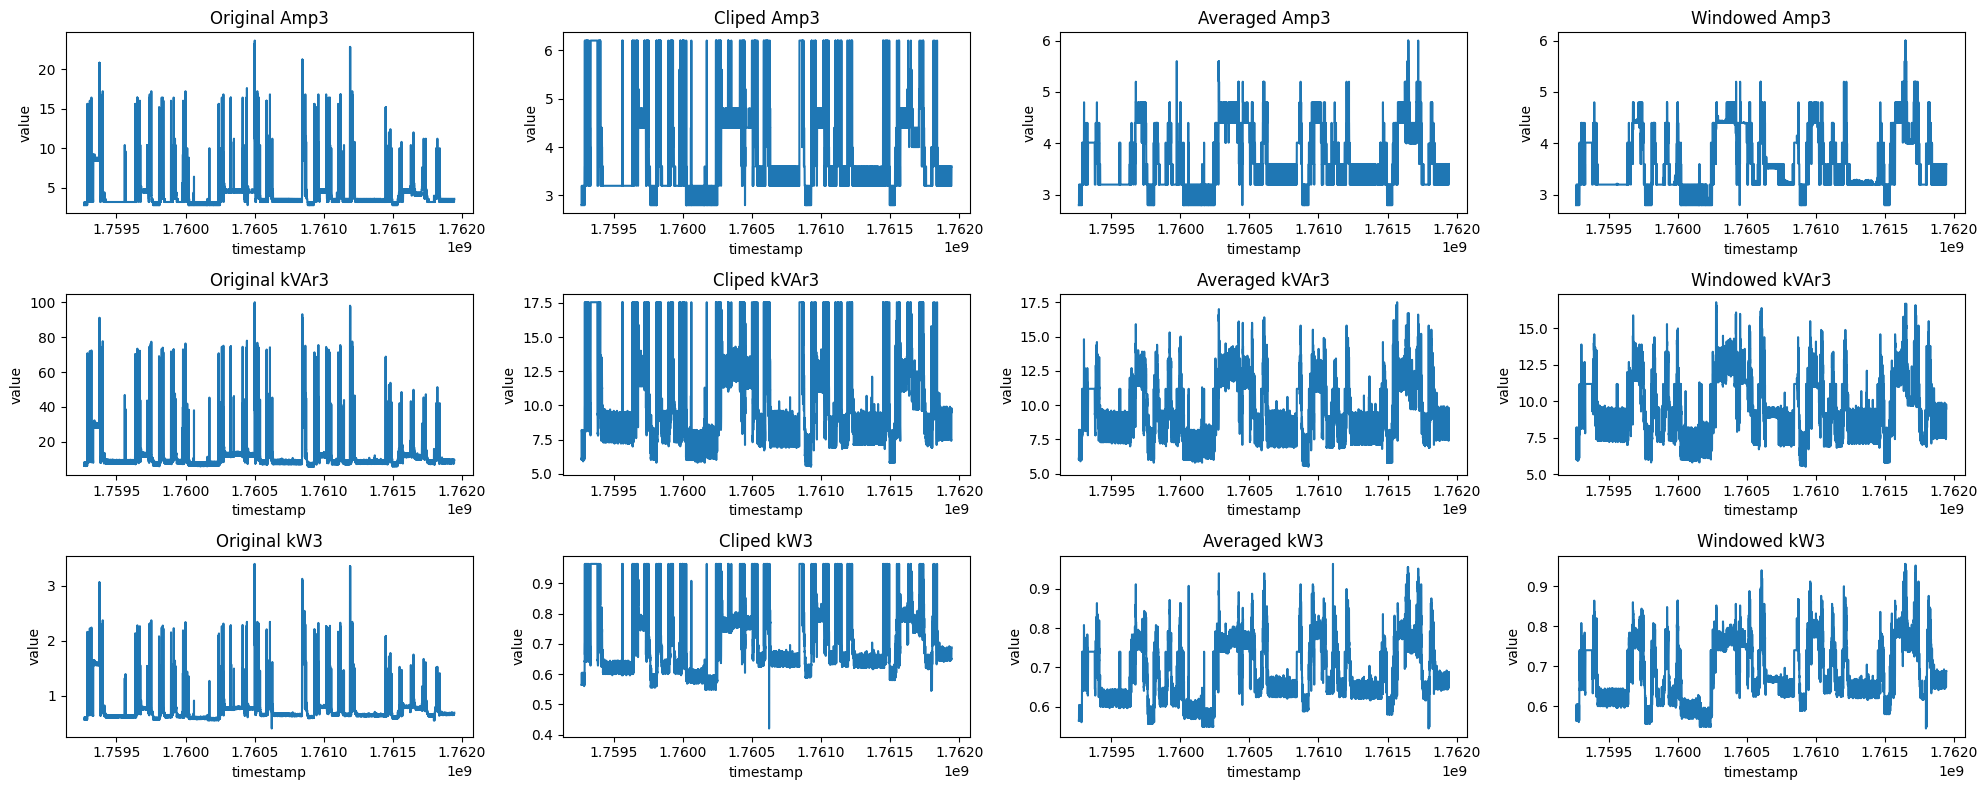

In [252]:
columns2clean = ['Amp1', 'Amp2', 'Amp3', 'Hz', 'PF1', 'PF2', 'PF3', 'PFa', 'TkVAr', 'TkW', 'V1', 'V2', 'V3', 'Vn1', 'Vn2', 'Vn3', 'kVAr1', 'kVAr2', 'kVAr3', 'kW1', 'kW2', 'kW3']

cliped = processed_df.copy()
averaged = processed_df.copy()

for column in columns2clean:
    Q1 = processed_df[column].quantile(0.25)
    Q3 = processed_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # first approach
    cliped[column] = processed_df[column].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

    # second approach
    outliers = processed_df[(processed_df[column] < Q1 - 1.5 * IQR) | (processed_df[column] > Q3 + 1.5 * IQR)][column]
    averaged.loc[outliers.index, column] = processed_df[column].mean()

# third approach
windowed = averaged.copy()

for column in columns2clean:
    roll = windowed[column].rolling(window=100, center=True, min_periods=1)

    Q1 = roll.quantile(0.25)
    Q3 = roll.quantile(0.75)
    IQR = Q3 - Q1

    mask = (windowed[column] < Q1 - 1.5 * IQR) | (windowed[column] > Q3 + 1.5 * IQR)

    rolling_mean = roll.mean().fillna(windowed[column].mean())
    windowed.loc[mask, column] = rolling_mean[mask]

plt.figure(figsize=(20, 8))

plt.subplot(3, 4, 1)
plt.plot(processed_df['Amp3'])
plt.xlabel("timestamp")
plt.title('Original Amp3')
plt.ylabel('value')

plt.subplot(3, 4, 2)
plt.plot(cliped['Amp3'])
plt.xlabel("timestamp")
plt.title('Cliped Amp3')
plt.ylabel('value')

plt.subplot(3, 4, 3)
plt.plot(averaged['Amp3'])
plt.xlabel("timestamp")
plt.title('Averaged Amp3')
plt.ylabel('value')

plt.subplot(3, 4, 4)
plt.plot(windowed['Amp3'])
plt.xlabel("timestamp")
plt.title('Windowed Amp3')
plt.ylabel('value')

plt.subplot(3, 4, 5)
plt.plot(processed_df['kVAr3'])
plt.xlabel("timestamp")
plt.title('Original kVAr3')
plt.ylabel('value')

plt.subplot(3, 4, 6)
plt.plot(cliped['kVAr3'])
plt.xlabel("timestamp")
plt.title('Cliped kVAr3')
plt.ylabel('value')

plt.subplot(3, 4, 7)
plt.plot(averaged['kVAr3'])
plt.xlabel("timestamp")
plt.title('Averaged kVAr3')
plt.ylabel('value')

plt.subplot(3, 4, 8)
plt.plot(windowed['kVAr3'])
plt.xlabel("timestamp")
plt.title('Windowed kVAr3')
plt.ylabel('value')

plt.subplot(3, 4, 9)
plt.plot(processed_df['kW3'])
plt.xlabel("timestamp")
plt.title('Original kW3')
plt.ylabel('value')

plt.subplot(3, 4, 10)
plt.plot(cliped['kW3'])
plt.xlabel("timestamp")
plt.title('Cliped kW3')
plt.ylabel('value')

plt.subplot(3, 4, 11)
plt.plot(averaged['kW3'])
plt.xlabel("timestamp")
plt.title('Averaged kW3')
plt.ylabel('value')

plt.subplot(3, 4, 12)
plt.plot(windowed['kW3'])
plt.xlabel("timestamp")
plt.title('Windowed kW3')
plt.ylabel('value')

plt.tight_layout()
plt.show()

processed_df = windowed

### **5. De-noising methods:**

There are plenty of de-noising methods out there that I can use. But I'll just use the famous moving average filter.

I noticed after playing with the parameters for a while that applying the same filter but with smaller window size gives a lot smoother plots.

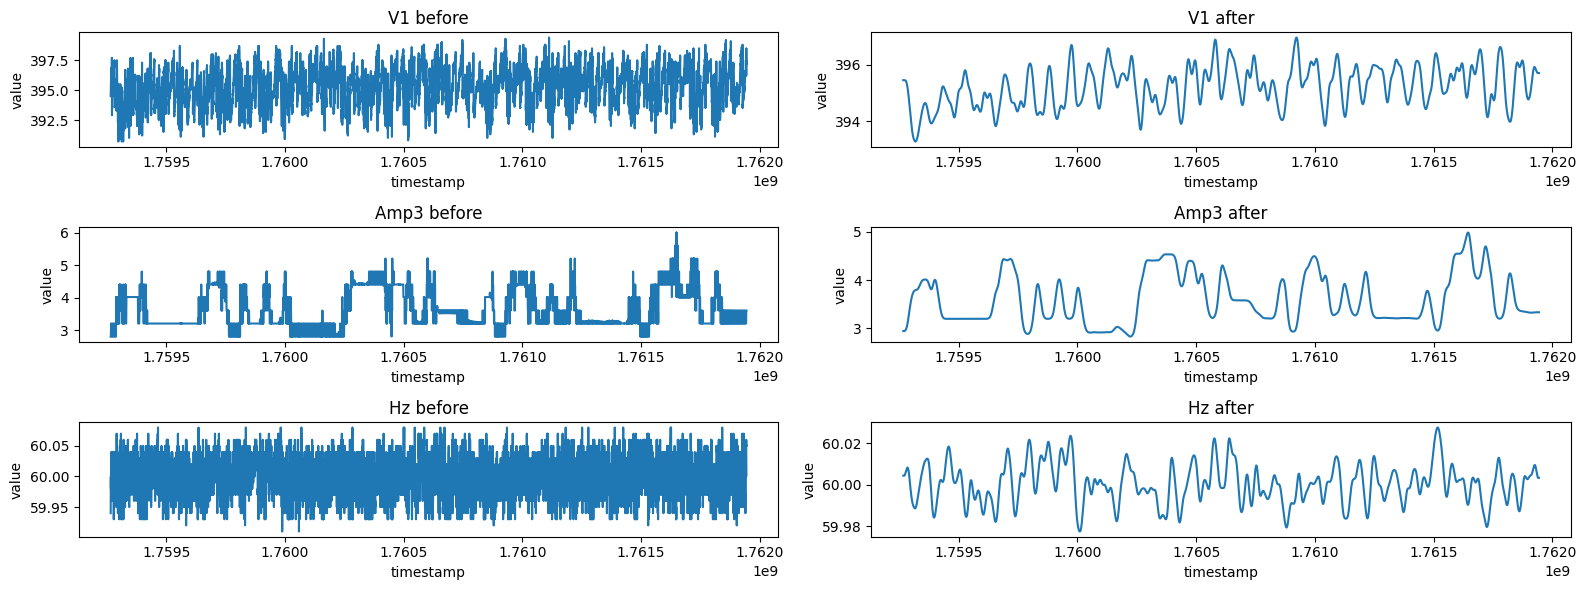

In [253]:
# moving average filter
old = processed_df.copy()

for i in range(10):
    processed_df[columns2clean] = processed_df[columns2clean].apply(lambda x: x.rolling(window=30, center=True).mean().ffill().bfill())

plt.figure(figsize=(16, 6))

plt.subplot(3, 2, 1)
plt.plot(old['V1'])
plt.xlabel("timestamp")
plt.title('V1 before')
plt.ylabel('value')

plt.subplot(3, 2, 2)
plt.plot(processed_df['V1'])
plt.xlabel("timestamp")
plt.title('V1 after')
plt.ylabel('value')

plt.subplot(3, 2, 3)
plt.plot(old['Amp3'])
plt.xlabel("timestamp")
plt.title('Amp3 before')
plt.ylabel('value')

plt.subplot(3, 2, 4)
plt.plot(processed_df['Amp3'])
plt.xlabel("timestamp")
plt.title('Amp3 after')
plt.ylabel('value')

plt.subplot(3, 2, 5)
plt.plot(old['Hz'])
plt.xlabel("timestamp")
plt.title('Hz before')
plt.ylabel('value')

plt.subplot(3, 2, 6)
plt.plot(processed_df['Hz'])
plt.xlabel("timestamp")
plt.title('Hz after')
plt.ylabel('value')

plt.tight_layout()
plt.show()

### **6. Normalization / scaling:** 

As I showed previously, the scales of the different quantities are significantly various. These scale differences can caues several issues such as making it harder for models to train, producing unstable gradients, and it might even cause some issues such as saturated neurons at some model architectures.

There are several algorithms to apply scaling, but I'll just use a simple and fast approach. I'll normalize each column making its values all between 0.0 and 1.0 using the following code:

In [254]:
from sklearn.preprocessing import minmax_scale

processed_df = processed_df.apply(lambda x: minmax_scale(x, feature_range=(0.0, 1.0)))

processed_df.describe()

,timestamp,PF1,kW1,kVAr1,kWh,Amp1,kVArh,Hz,Vn1,Amp2,...,Vn3,kVAr3,TkVAr,kW2,TkW,PFa,kVAr2,PF3,PF2,kW3
count,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.0,8882.000000,8882.000000,8882.000000,...,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000,8882.000000
mean,0.499995,0.505413,0.451380,0.523114,0.522132,0.422145,0.0,0.458155,0.510147,0.659508,...,0.523878,0.402513,0.330442,0.492447,0.491748,0.360255,0.401567,0.586244,0.674705,0.406687
std,0.288724,0.254460,0.283134,0.266827,0.288213,0.243750,0.0,0.188954,0.191520,0.185174,...,0.204269,0.245151,0.205718,0.163924,0.248403,0.184807,0.195645,0.256486,0.183197,0.236009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249993,0.273379,0.163494,0.294773,0.277440,0.171034,0.0,0.339414,0.371160,0.614523,...,0.377313,0.207976,0.178806,0.387900,0.282732,0.226322,0.283677,0.454309,0.572030,0.233533
50%,0.499998,0.579734,0.548937,0.508790,0.539468,0.488295,0.0,0.459500,0.508326,0.666531,...,0.525059,0.341420,0.280172,0.520971,0.461696,0.327871,0.434721,0.680411,0.714478,0.350594
75%,0.749994,0.676263,0.641498,0.738986,0.779893,0.619623,0.0,0.569257,0.655833,0.705581,...,0.678485,0.630901,0.426867,0.590143,0.697036,0.501854,0.521324,0.769334,0.793365,0.631270
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **3️⃣ Time-Series Analysis**

### **Q 3.1 Why did you choose this method?**

I implemented an algorithm that relies on the Interquartile Range (IQR) Statistical method to detect ourliers since it is stable, reliable, simple, easy to implement, I am experienced with it in college, and also I tried it and it worked out just great with this dataset. The algorithm also uses the moving average filter to smooth out the readings.

The way the algorithm works is by first detecting the outliers using IQR in all the values without using a window, it then replaces these values with an average. Then it repeat the first step but with using a window instead of applying the recplacement mechanism to all values at ones. Finally, it will apply the moving average denoising filter to smooth the signal and remove futher spikes or reduce them.

### **Q 3.2 How would it handle sudden spikes, sensor errors, or abnormal behavior?**

- **sudden spikes:** It handles this by replacing the outliers with the average value twice (once without a window and then with a window), and then it uses a denoising filter to smooth any remaining minor flunctuations after replacement. After these steps, we end up with removed spikes or reduced, resulting in a way more cleaner and stable signal.

- **sensor errors & abnormal behavior:** Noises, extreme values, or physically impssible values, all of these issues will be easily delt with as follows: The noise will be remove using the denoising filter, the extreme values will get removed or reduced by replacing them with the average value, and the physically impossible values will simply be detected as outliers and replaced.

### **Q 3.3 What features or windows would you use?**

- #### **features:**

If by "features" you mean what columns would I preprocess, then I picked these 22 features: Amp1, Amp2, Amp3, Hz, PF1, PF2, PF3, PFa, TkVAr, TkW, V1, V2, V3, Vn1, Vn2, Vn3, kVAr1, kVAr2, kVAr3, kW1, kW2, kW3

These are the features which are suffering from abnormal behaviours. Of course, the datetime and timestamp don't count. And the comulative features, kVArh and kWh, are very stable and smooth and don't need to be further cleaned.

- #### **windows:**

For detecting outliers I didn't use a window at first, I applied the calculations at all the values. After that I repeated the same process but with using a window of size 100. But for the denoising filter, I used a window of size 30 and applied the filter 10 times. I reached this approach after several tests.

The following is the complete code implementation for this approach:

In [ ]:
def data_cleaner(data):
    df = data.copy()

    columns2clean = ['Amp1', 'Amp2', 'Amp3', 'Hz', 'PF1', 'PF2', 'PF3', 'PFa', 'TkVAr', 'TkW', 'V1', 'V2', 'V3', 'Vn1', 'Vn2', 'Vn3', 'kVAr1', 'kVAr2', 'kVAr3', 'kW1', 'kW2', 'kW3']

    # outliers replacement
    for column in columns2clean:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)][column]
        df.loc[outliers.index, column] = df[column].mean()
    
        roll = df[column].rolling(window=100, center=True, min_periods=1)

        Q1 = roll.quantile(0.25)
        Q3 = roll.quantile(0.75)
        IQR = Q3 - Q1

        mask = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)

        rolling_mean = roll.mean().fillna(df[column].mean())
        df.loc[mask, column] = rolling_mean[mask]

    # de-noising
    for i in range(10):
        df[columns2clean] = df[columns2clean].apply(lambda x: x.rolling(window=30, center=True).mean().ffill().bfill())
    
    return df

## **4️⃣ IoT System Logic & Operational Thinking**

### At a certain timestamp, the system reports the following values:

|kW1|0.0|
|---|---|
|Amp1|0.2|
|PF1|0.60|
|Vn1|228.0|
|Hz|60.00|
|kWh|continues increasing normally|

### Using only the telemetry keys available in the attached file: 

#### 1. Is this behavior normal or abnormal?

Hz and Vn1 are totaly normal, actualy, they are equal to their average values. kWh is normally increasing even though kW1 is 0. This might happen due to the fact that this is a three phases building. This means that kW2 and kW3 might not be zero. So far. Now when it comes to Amp1 and kW1, although it is normal for Amp1 and kW1 to decrease together since they are directly propotioned, but this behavior didn't happen before in the dataset. For Amp1, the lowest value it had in the dataset is 1.2, and for kW1, is 0.16. I didn't understand the behavior of PF1, it has the average value which is 0.6. But PF1 is directly propotioned with both kW1 and Amp1 as the dataset statistics that I calculated before showed. This might happen if kVAr1 decreased too, but I have no clue about this.

My final answer is while this behavior might be physically possible, it is still abnormal.

#### 2. Provide an operational interpretation of what might cause this reading.

Since the voltage value is normal and the frequency too, this means that the phase is connected to power, but no active power is being drawn by devices.

#### 3. Discuss at least 3 possible explanations, such as measurement delays, current leakage, low-load conditions, sensor inaccuracies, or accumulated energy behavior.

1. **Current Leakage in Idle Phase:** This behavior might occur if there are no devices drawing active power, but there is still some tiny current leakage.

2. **Capacitive Load:** If there are no devices drawing active power, and there is a capacitive load, then we'll see such a behavior. The active power is 0 because no device is consuming it, and the small current is produced by a capacitive load. The value of the reactive power (kVAr1) is always negative in the dataset, which indicates an existence of a capacitive load. This is why I think this explaination is the most probable.

3. **Sensor Inaccuracies:** The abnormal values of Amp1 and kW1 might be errors caused by the sensors. I think this explaination is the most unlikely. Because through all the samples that being collected each 5 minutes for 31 days, there is no a single instance of any behavior similar to this. Also the only abnormal values happen to be physically related, and they correctly matched their physical relationship. These notes increase the chanse of these values being real and correctly detected be sensors.

## **5️⃣ Predictive Modeling**

- ## **Pseudocode:**

Here is a pseudocode for an LSTM model that takes the water consumption for 60 minutes (this is an arbitrary value) as an input, then predicts for the next 15 minutes:

```Python
#Loading and cleaning data
data = download("water consumption dataset")

data = handle_missing_values(data)
data = sort_by_timestamp(data)
data = handle_outliers(data)
data = denoise(data)
data = normalize(data)

#Feature engineering
data["day_of_week"] = extract_days(data)


#Defining the prediction window
INPUT_WINDOW = 60 # minutes
PREDICTION_WINDOW = 15 # minutes

func create_sequences(data)
    sequences = []
    targets = []

    for i in range(INPUT_WINDOW, len(data) - FORECAST_HORIZON)
        sequences.append(data[i - INPUT_WINDOW : i])
        labels.append(data[i + FORECAST_HORIZON])
    
    return sequences, labels

x, y = create_sequences(data)

#Splitting data (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # split 30% of the data for testing, and 70% for training

#Model selection (e.g., LSTM, Random Forest, etc.)
model = LSTM(inp_size, out_size, num_layers=layers) # assuming inp_size, out_size, and layers are defined

model.fit(loss='MSE', optimizer='AdamW', lr=1e-1, X_train, y_train, epochs=100, batch_size=128)

#Prediction logic
print(model.predict(X_test)) #display predictions
```

- ## **Full Executable Code:**

This code implementation is slightly different. It's basically a model implementation that takes the water consumption measurments for the last 7 days as input and then predict the consumption for the next day.

### **1. The Dataset (Fiviple water consumption dataset):**

I spent some time searching and exploring free datasets that I can use. I found few good datasets but unfortunately they had restricted access permissions. And I also found open-sourced datasets, but they all were very bad and almost useless in my opinion. After almost giving up on this, I suddenly got the idea of making my own water consumption dataset! And I made it very similar to any raw datasets so it still need preprocessing and feature engineering or else the model will perform bad. I didn't cheat, I didn't make easy for me.

It is a tabular dataset about the water consumption in one year for 5 people that live together in one apartment. Each row contains 5 measurments collected in one day. These measurments are: the lowest temperature, highest temperature, lowest humidity, highest humidity, and total water consumption. There are also some hidden information can be extracted from these measurements. For example, all the 5 measurments change following some trends, figuring out these trend can significantly improve the model performance and ease training process. Also, the fact that there are trends and the data isn't totally random raise the need of some model architecture that has some type of memory (e.g. LSTM, and GRU). But this need can be neglected by simply giving an MLP (for example) multiple rows at once by flattening them together as if they were one row. In this way, the model will still be able to perform good enough at this dataset.

The dataset is public and open-source, and it can be found here: https://www.kaggle.com/datasets/firasghazialsadiq/fiviple-water-consumption-dataset

#### **1.1 Downloading The Dataset:**

In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("firasghazialsadiq/fiviple-water-consumption-dataset")

path = os.path.join(path, 'water consumption dataset')
path

c:\Users\NEMFi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'C:\\Users\\NEMFi\\.cache\\kagglehub\\datasets\\firasghazialsadiq\\fiviple-water-consumption-dataset\\versions\\5\\water consumption dataset'

#### **1.2 Reading & Exploring The Dataset:**

You'll find the following files inside the dataset's folder:
```
fiviple-water-consumption-dataset/
│── test.csv
│── train.csv
│── val.csv
```

In [23]:
os.listdir(path)

['test.csv', 'train.csv', 'val.csv']

In [38]:
import pandas

# read the datasets
train_df = pandas.read_csv(os.path.join(path, 'test.csv'))
test_df = pandas.read_csv(os.path.join(path, 'train.csv'))
val_df = pandas.read_csv(os.path.join(path, 'val.csv'))

# compare them
print('total number of rows in the training dataset:', len(train_df))
print('training dataset columns:', list(train_df.columns))

print('\ntotal number of rows in the testing dataset:', len(test_df))
print('testing dataset columns:', list(test_df.columns))

print('\ntotal number of rows in the validation dataset:', len(val_df))
print('validation dataset columns:', list(val_df.columns))

total number of rows in the training dataset: 365
training dataset columns: ['low temp', 'high temp', 'low humidity', 'high humidity', 'water consumption']

total number of rows in the testing dataset: 365
testing dataset columns: ['low temp', 'high temp', 'low humidity', 'high humidity', 'water consumption']

total number of rows in the validation dataset: 365
validation dataset columns: ['low temp', 'high temp', 'low humidity', 'high humidity', 'water consumption']


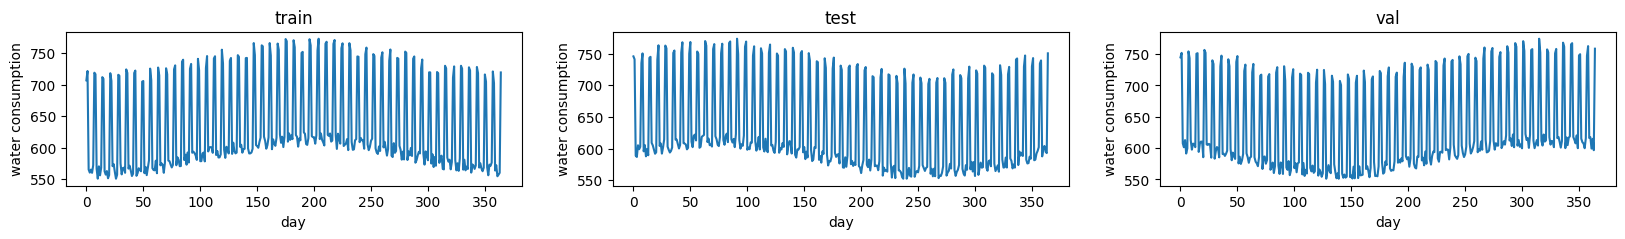

In [42]:
plt.figure(figsize=(20, 2))

plt.subplot(1, 3, 1)
plt.plot(train_df['water consumption'])
plt.xlabel("day")
plt.title('train')
plt.ylabel('water consumption')

plt.subplot(1, 3, 2)
plt.plot(test_df['water consumption'])
plt.xlabel("day")
plt.title('test')
plt.ylabel('water consumption')

plt.subplot(1, 3, 3)
plt.plot(val_df['water consumption'])
plt.xlabel("day")
plt.title('val')
plt.ylabel('water consumption')

plt.show()

In [31]:
train_df.head()

,low temp,high temp,low humidity,high humidity,water consumption
0,-4.8,5.4,30.5,52.5,707.1
1,-4.7,5.4,30.7,53.0,721.9
2,-4.9,5.3,31.7,52.9,565.5
3,-4.8,5.5,30.3,52.7,560.7
4,-5.0,5.3,30.4,51.0,565.5


#### **1.3 Custom Dataset Class & Preprocessing:**

I created a custom dataset class to simplify the code later on and make dealing with data more flexible and smoother. Also I scaled the values to be in the range [-1, 1]. I came up with this after analyzing the performance and appling several tests. I managed to reach satisfying results without using other preprocessing techniques. Thus, I'll stop here.

In [179]:
from torch.utils.data import Dataset
from sklearn.preprocessing import minmax_scale
import torchvision.transforms as transforms

class WaterConsumptionDataset(Dataset):
    def __init__(self, input_window, path, split):
        
        self.input_window = max(1, input_window)

        df = pandas.read_csv(os.path.join(path, split + '.csv'))

        self.x = df

        # scaling
        self.x = self.x.apply(lambda x: minmax_scale(x, feature_range=(-1.0, 1.0)))
        
        self.y = df['water consumption']

        # to convert from numpy.array into torch.Tensor
        self.converter = transforms.ToTensor()

    def __len__(self):
        return len(self.x) - self.input_window

    def __getitem__(self, idx):
        if idx >= len(self):
            return

        return self.converter(self.x.iloc[idx : idx + self.input_window].values).squeeze(0), self.y[idx + self.input_window]

In [180]:
train_dataset = WaterConsumptionDataset(7, path, 'train')
test_dataset = WaterConsumptionDataset(7, path, 'train')

x, y = train_dataset[1]

print(x.shape)
print(y)

torch.Size([7, 5])
750.5


#### **1.4 DataLoader:**

To train the model faster, I used torch.utils.data.DataLoader which enables me to retrieve data in batches instead of processing them slowly one by one. I also shuffled the training dataset to push the model into understanding the data better.

In [181]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

X, Y = next(iter(train_dataloader))

print(X.shape)
print(Y.shape)

torch.Size([128, 7, 5])
torch.Size([128])


### **2. The Model:**

I created a model that is composed of 1 dense layer, 1 LSTM layer, and 2 Dense layers, respectfully. I got to this structure after analizing the performance and conducting several tests with different structures. I also tried to use activation functions such as relu, but the results were worse. And I also tried to apply dropout and it didn't help. Finally, I ended up with this structure which actually performed great.

In [182]:
import torch.nn as nn

class LSTMPredictor(nn.Module):
    def __init__(self, inp_size=5):
        super(LSTMPredictor, self).__init__()

        self.fc1 = nn.Linear(inp_size, 15)
        self.lstm = nn.LSTM(15, 30, num_layers=1, batch_first=True)
        self.fc2 = nn.Linear(30, 15)
        self.fc3 = nn.Linear(15, 1)

    def forward(self, X):
        X = self.fc1(X)
        X, _ = self.lstm(X)
        X = self.fc2(X[:, -1])
        X = self.fc3(X)

        return X

In [212]:
import torch

model = LSTMPredictor()

# run the model on the gpu if there is one
# this speeds up the training a lot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTMPredictor(
  (fc1): Linear(in_features=5, out_features=15, bias=True)
  (lstm): LSTM(15, 30, batch_first=True)
  (fc2): Linear(in_features=30, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=1, bias=True)
)

### **3. Choosing The Optimizer and Criterion:**

For the criterion/loss function, I used the mean squared error (MSE). Since this is a regression problem, MSE is the default choice here. But when it comes to the optimization method, I arbitrary chose AdamW. I came up with this learning rate value after testing several other values.

In [213]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-1)

### **4. Training:**

I used the root mean squared error (RMSE) metric to display the training progress using a more interpretable values unlike MSE.

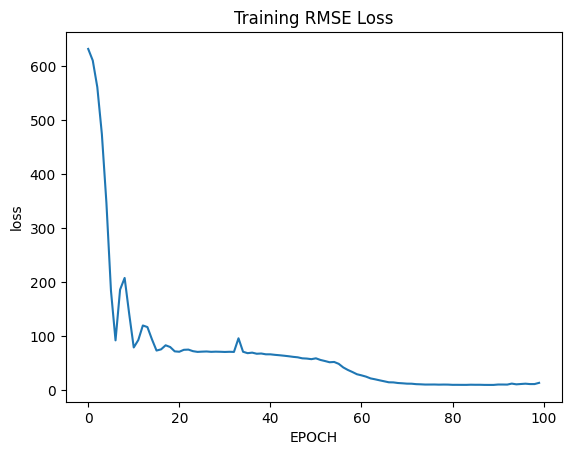

In [214]:
import matplotlib.pyplot as plt

def train_model():
    train_losses = []

    model.train()

    for epoch in range(100):
        avg_loss = 0.0

        for X, targets in train_dataloader:
            X, targets = X.to(device).to(torch.float32), targets.to(device).to(torch.float32)

            optimizer.zero_grad()
            
            predictions = model(X)
            
            loss = criterion(predictions.reshape(-1), targets)
            avg_loss += loss.sqrt().item()
            
            loss.backward()
            optimizer.step()
        
        avg_loss /= len(train_dataloader)
        train_losses.append(avg_loss)

    plt.plot(train_losses)
    plt.xlabel("EPOCH")
    plt.ylabel("loss")
    plt.title("Training RMSE Loss")
    plt.show()

train_model()

### **5. Testing:**

Average Test RMSE Loss: 8.441184443468488


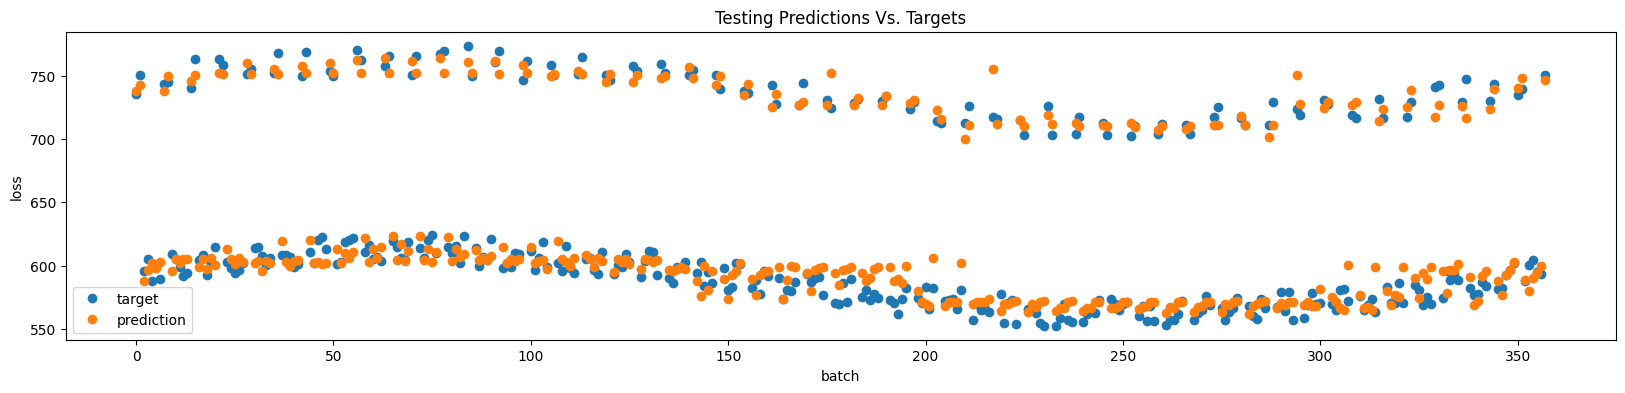

In [215]:
def test_model():
    from sklearn.metrics import root_mean_squared_error

    avg_loss = 0.0

    predictions = []
    targets = []

    model.eval()
    for X, target in test_dataloader:
        X, target = X.to(device).to(torch.float32), target.to(device).to(torch.float32)

        optimizer.zero_grad()
        
        prediction = model(X)

        predictions.append(prediction.item())
        targets.append(target.item())
        
        loss = root_mean_squared_error(target.cpu().detach().numpy(), prediction.reshape(-1).cpu().detach().numpy())
        avg_loss += loss

    avg_loss /= len(test_dataloader)

    print('Average Test RMSE Loss:', avg_loss)

    plt.figure(figsize=(20, 4))
    plt.plot(targets, 'o', label='target', )
    plt.plot(predictions, 'o', label='prediction')
    plt.xlabel("batch")
    plt.ylabel("loss")
    plt.title("Testing Predictions Vs. Targets")
    plt.legend()
    plt.show()
    plt.show()

test_model()

## **6️⃣ Creativity & Feature Engineering**

Although the model performed well, the performance can still be improved with some feature engineering techniques. At first, I tried to add an additional column to the inputs that represnt the water consumption trend (```df['water consumption'].diff()```) but it didn't helpl. After that I added two features, the first indicates whether a specific day is a weekend or not, the second one represent the number of the day (i.e. 1,2,3...365). With only these two additional features, it became much easier for the model to understand and predict the trends. The dataset contains minor noises, but with these two features, the model managed to ignore the noises and produce smooth and precise curves as it shown below.

I only needed two lines of code to add these features. Thus, the dataset class is almost identical to the previous one.

In [164]:
class WaterConsumptionDataset(Dataset):
    def __init__(self, input_window, path, split):
        
        self.input_window = max(1, input_window)

        df = pandas.read_csv(os.path.join(path, split + '.csv'))

        self.x = df
        
        # feature engineering
        self.x['weekend'] = [1 if (d % 7) == 1 or (d % 7) == 2 else 0 for d in range(1, 366)] # 1
        self.x['day'] = [d for d in range(1, 366)] # 2


        self.x = self.x.apply(lambda x: minmax_scale(x, feature_range=(-1.0, 1.0)))
        
        self.y = df['water consumption']


        self.converter = transforms.ToTensor()

    def __len__(self):
        return len(self.x) - self.input_window

    def __getitem__(self, idx):
        if idx >= len(self):
            return

        return self.converter(self.x.iloc[idx : idx + self.input_window].values).squeeze(0), self.y[idx + self.input_window]

In [174]:
# run these again:

train_dataset = WaterConsumptionDataset(7, path, 'train')
test_dataset = WaterConsumptionDataset(7, path, 'train')

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

model = LSTMPredictor(7)
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-1)

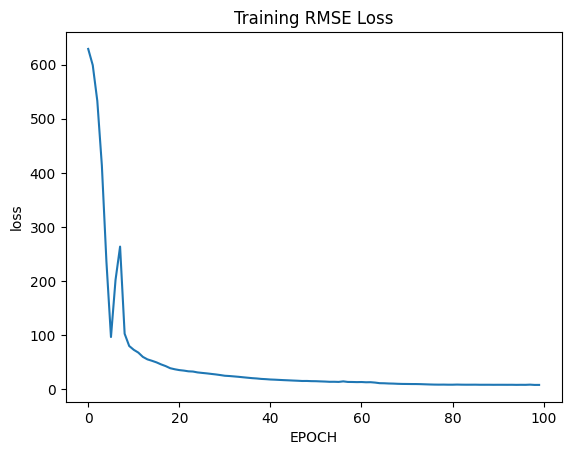

In [175]:
train_model()

Average Test RMSE Loss: 6.236400582936889


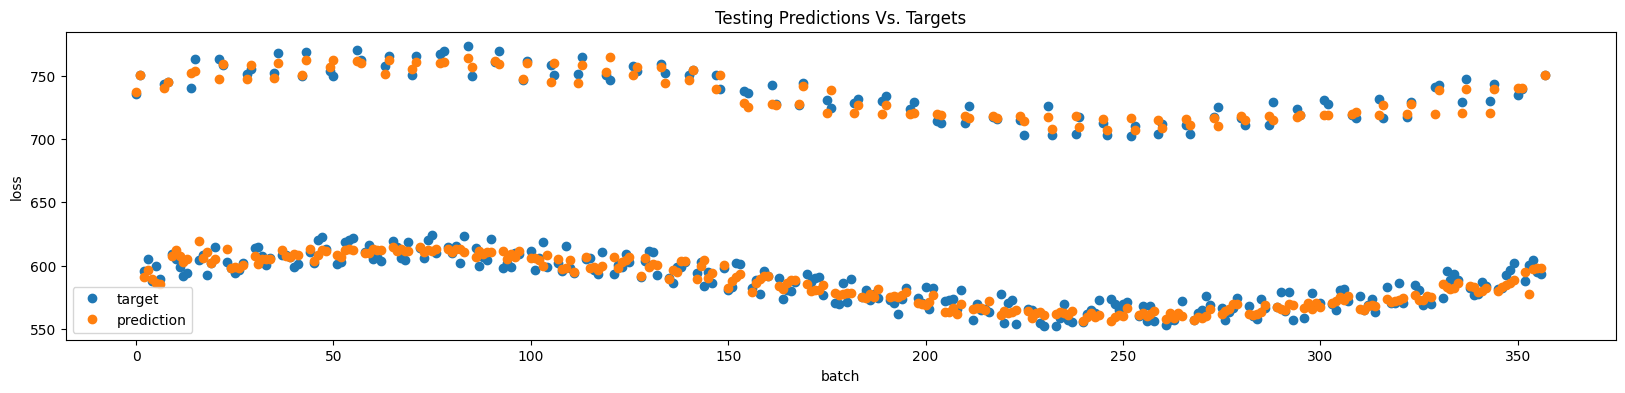

In [203]:
test_model()

### **Critical Issue:**

I faced an anoying issue while training the model. Sometimes, it reached good results as the one seen here, but in other times it fails. This happens because Pytorch initializes the model's weights using some techniques, but this techniques are affected by some randomness. Useually, this randomness isn't issus, but unfurtionatly, it is here. This issue became rarer to happen after using the engineered features, but it still exist. So, you might just need to reinitialize the model again if this code didn't show similar results. An easy fix to this is to just use a constant seed value that produce good model. But I got tired and I'll just stop here.